In [ ]:
!pip install tensorflow

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 115s 7s/step
Surrogate Model Accuracy: 1.00


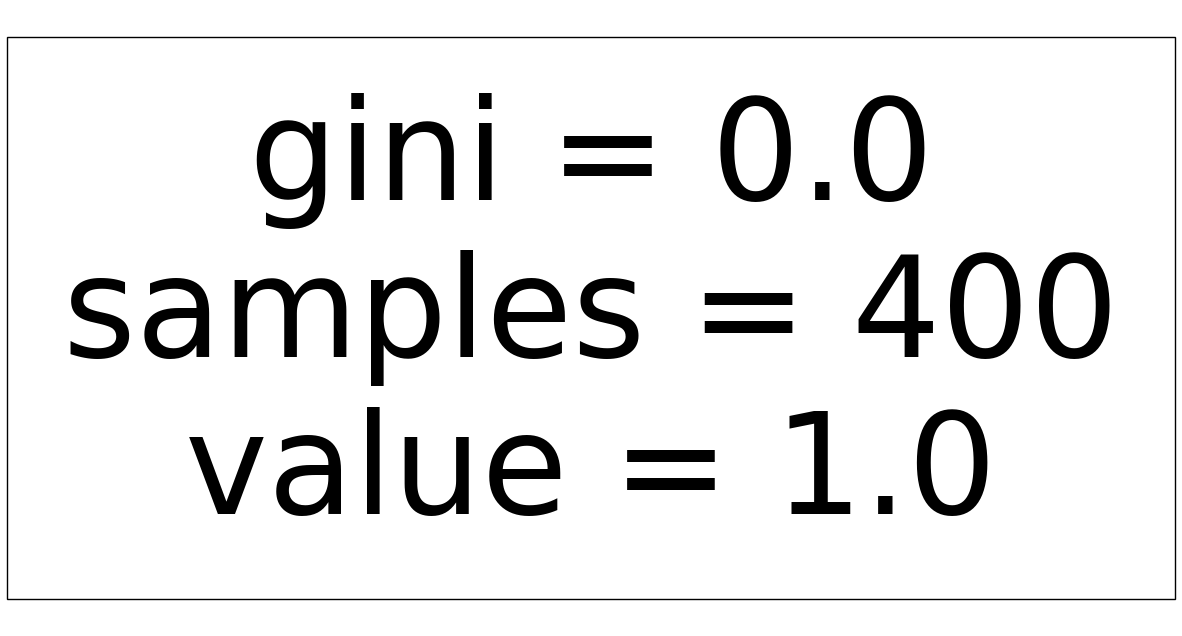

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# Load a pre-trained CNN model (VGG16)
model = VGG16(weights='imagenet', include_top=True)

# Function to preprocess image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.vgg16.preprocess_input(img_array)
    return img_array

# Generate synthetic dataset
num_samples = 500
X = np.random.rand(num_samples, 224, 224, 3)  # Fake image data
y_pred = model.predict(X)
y = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Flatten images for surrogate model
X_flattened = X.reshape(num_samples, -1)

# Train a Decision Tree as a surrogate model
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)
surrogate_model = DecisionTreeClassifier(max_depth=5, random_state=42)
surrogate_model.fit(X_train, y_train)

# Evaluate the surrogate model
accuracy = surrogate_model.score(X_test, y_test)
print(f"Surrogate Model Accuracy: {accuracy:.2f}")

# Visualize the tree structure
from sklearn import tree
plt.figure(figsize=(15, 8))
tree.plot_tree(surrogate_model, filled=True, feature_names=[f'pixel_{i}' for i in range(X_flattened.shape[1])], max_depth=3)
plt.show()
